# Sen12MS EDA 

A notebook to investigate regions and class distributions

Author: Taeil Goh

**For class distribution and other overview, please see `Sen12MSOverview` notebook.**

## Summary

- The data in SEN12MS `180662` patches consist of 3 Geotif files, Sentinel-1, Sentinel-2 and MODIS. 
- `Sentinel-1` dual-pol SAR(Synthetic Aperture Radar (SAR)), `Sentinel-2` multi-spectral (compressed to RGB), `MODIS` (the Moderate Resolution Imaging Spectroradiometer)
- Sentinel-1 includes 2 images, VV and VH polarized images. (what is VV, VH)
- Sentinel-2 includes 13 images for different wavelength bands where bands 2,3 and 4 are the RGB.
- MODIS Land Cover (Moderate Resolution Imaging Spectroradiometer) includes 2 images per satellite. There is an overlap of 50% of the area in the same season
- The patches are organized by season Winter, Spring, Summer and Fal as you see below. 

In [1]:
root = "/storage/sen12ms_x"
!ls $root

ROIs1158_spring  ROIs1868_summer  ROIs1970_fall  ROIs2017_winter


In [2]:
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import rasterio
import numpy as np
from pyproj import Proj, transform

classes = [
    "Evergreen Needleleaf Forests",
    "Evergreen Broadleaf Forests",
    "Deciduous Needleleaf Forests",
    "Deciduous Broadleaf Forests",
    "Mixed Forests",
    "Closed (Dense) Shrublands",
    "Open (Sparse) Shrublands",
    "Woody Savannas",
    "Savannas",
    "Grasslands",
    "Permanent Wetlands",
    "Croplands",
    "Urban and Built-Up Lands",
    "Cropland/Natural Vegetation Mosaics",
    "Permanent Snow and Ice",
    "Barren",
    "Water Bodies"
]

## Iterate through files

In [3]:
tiles = pd.DataFrame(glob.glob(os.path.join(root,'*','*','*.tif')), columns=["path"])
split = tiles["path"].apply(lambda path: os.path.basename(path).split('_'))
split = pd.DataFrame.from_records(split, columns=["seed","season","sensor","region","tile"])
tiles = tiles.join(split)

In [4]:
tiles[["seed","season","sensor","region","tile"]].head()

,seed,season,sensor,region,tile
0,ROIs1970,fall,s1,149,p404.tif
1,ROIs1970,fall,s1,149,p798.tif
2,ROIs1970,fall,s1,149,p810.tif
3,ROIs1970,fall,s1,149,p186.tif
4,ROIs1970,fall,s1,149,p510.tif


In [5]:
# of patches 
tiles.shape[0]/3

180662.0

`tiles` dataframe contains the path. 

In [6]:
tiles["path"][88]

'/storage/sen12ms_x/ROIs1970_fall/s1_149/ROIs1970_fall_s1_149_p76.tif'

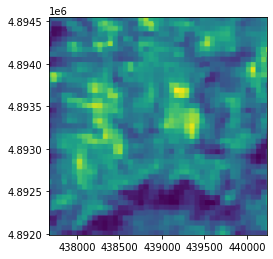

<AxesSubplot:>

In [7]:
idx = 87469
from rasterio.plot import show
img = rasterio.open(tiles["path"][idx])
show(img)

## Triplet

Each patch consist of 3 Geotif files, Sentinel-1, Sentinel-2 and MODIS. 

In [8]:
tiles[ (tiles["region"] == "149") & (tiles["tile"] == "p76.tif")]

,path,seed,season,sensor,region,tile
88,/storage/sen12ms_x/ROIs1970_fall/s1_149/ROIs19...,ROIs1970,fall,s1,149,p76.tif
87469,/storage/sen12ms_x/ROIs1970_fall/s2_149/ROIs19...,ROIs1970,fall,s2,149,p76.tif
185696,/storage/sen12ms_x/ROIs1970_fall/lc_149/ROIs19...,ROIs1970,fall,lc,149,p76.tif


In [9]:
sample_region = "149"
sample_tile = "p76.tif"

s1_sample = rasterio.open(tiles["path"][ (tiles["region"] == sample_region) & (tiles["tile"] == sample_tile) & (tiles["sensor"] == "s1")].iloc[0])
s2_sample = rasterio.open(tiles["path"][ (tiles["region"] == sample_region) & (tiles["tile"] == sample_tile) & (tiles["sensor"] == "s2")].iloc[0])
lc_sample = rasterio.open(tiles["path"][ (tiles["region"] == sample_region) & (tiles["tile"] == sample_tile) & (tiles["sensor"] == "lc")].iloc[0])


Notice that MODIS image is showing only 1st band (?) 

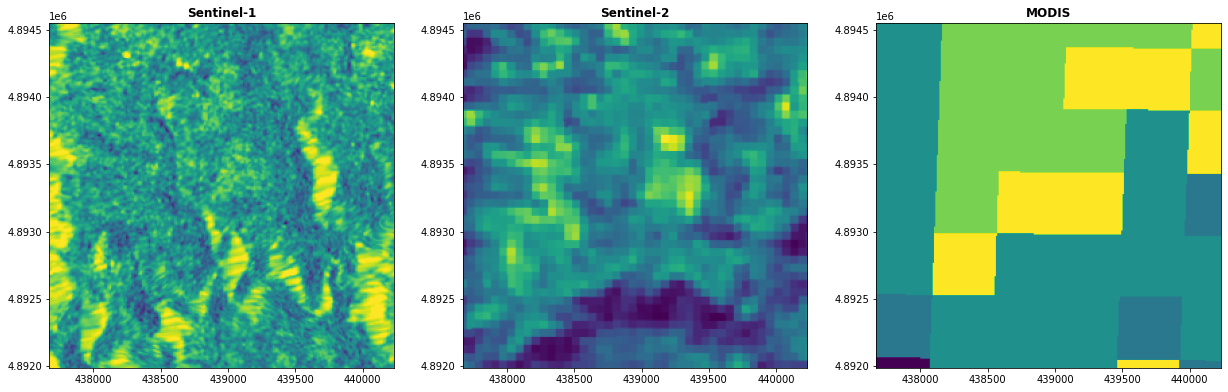

In [10]:
fig, axs = plt.subplots(1,3, figsize=(21,7))

show(s1_sample, ax=axs[0], title='Sentinel-1')
show(s2_sample, ax=axs[1], title='Sentinel-2')
show((lc_sample, 1), ax=axs[2], title='MODIS')

plt.show()

Lets look at each band.
- Sentinel-1 (SAR) has 2 bands. 
- Sentinel-2 (Multispectral) has 13 bands: B2 (Blue), B3 (Green), B4 (Red), B8 (Near-infrared), B5 (Red Edge 1), B6 (Red Edge 2), B7 (Red Edge 3), B8a (Red Edge 4), B11 (Short-wavelength infrared 1), and B12 (Short-wavelength infrared 2) 
- MODIS has 4 bands. 

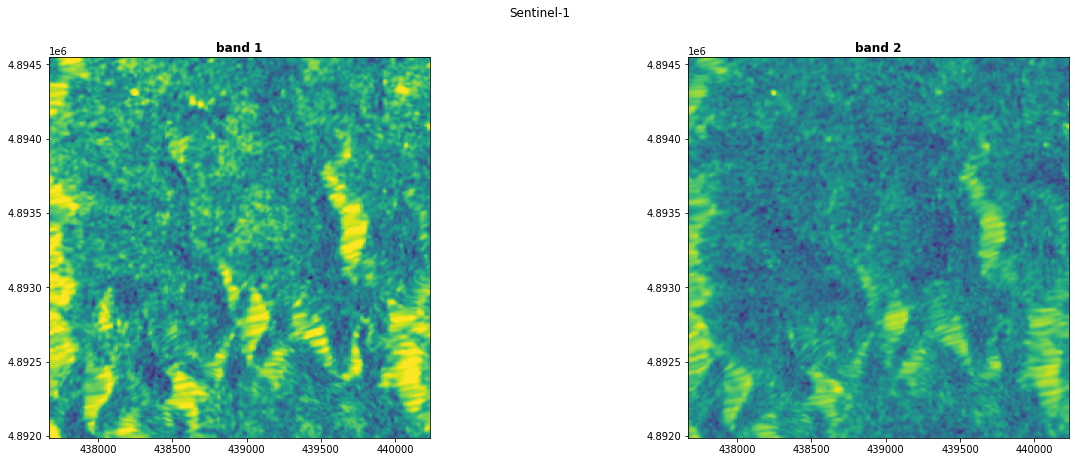

In [11]:
fig, axs = plt.subplots(1,2, figsize=(21,7))

fig.suptitle('Sentinel-1') 
for i in range(1,3):
    show((s1_sample, i), ax=axs[i-1], title= f'band {i}')

plt.show()

Sentinel-2 (Multispectral) has 13 bands: B2 (Blue), B3 (Green), B4 (Red), B8 (Near-infrared), B5 (Red Edge 1), B6 (Red Edge 2), B7 (Red Edge 3), B8a (Red Edge 4), B11 (Short-wavelength infrared 1), and B12 (Short-wavelength infrared 2)

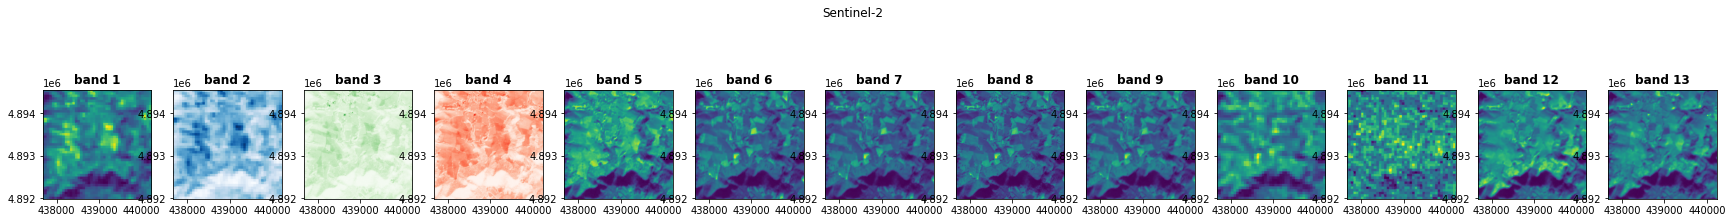

In [12]:
fig, axs = plt.subplots(1, 13, figsize=(30,4))
fig.suptitle('Sentinel-2') 
for i in range(1,14):
    if i == 2: 
        show((s2_sample, 1), ax=axs[i-1], cmap='Blues', title= f'band {i}')
    elif i == 3: 
        show((s2_sample, 2), ax=axs[i-1], cmap='Greens', title= f'band {i}')
    elif i == 4: 
        show((s2_sample, 3), ax=axs[i-1], cmap='Reds', title= f'band {i}')
    else:
        show((s2_sample, i), ax=axs[i-1], title= f'band {i}')
    
plt.show()

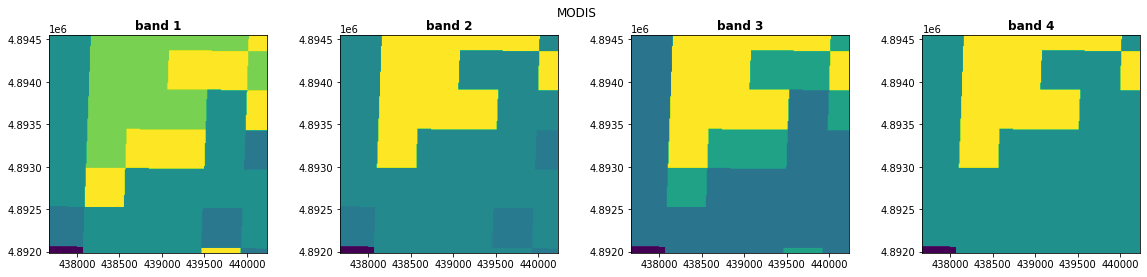

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(20,4))
fig.suptitle('MODIS') 
for i in range(1,5):
    show((lc_sample, i), ax=axs[i-1], title= f'band {i}')
    
plt.show()